In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc

In [7]:
df = pd.read_csv('../data/heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
y = df['target']

In [10]:
X = df.drop('target', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
gnb = GaussianNB()


In [55]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)     

In [56]:
print(f"Кол-во неправильных точек из {X_test.shape[0]} : {(y_test != 	y_pred).sum()}")

Кол-во неправильных точек из 61 : 8


In [57]:
f"{(100 - (y_test != y_pred).sum() / X_test.shape[0]* 100):.2f}%"

'86.89%'

In [58]:
confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 5, 27]])

In [59]:
accuracy_score(y_test, y_pred)

0.8688524590163934

In [60]:
precision_score(y_test, y_pred)

0.9

In [61]:
f1_score(y_test, y_pred)

0.8709677419354839

In [19]:
recall_score(y_test, y_pred)

0.84375

In [20]:
y_probs = gnb.predict_proba(X_test)[:, 1]

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [22]:
roc_auc = auc(fpr, tpr)

In [23]:
f"Площадь: {roc_auc:.4f}"

'Площадь: 0.8944'

In [24]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

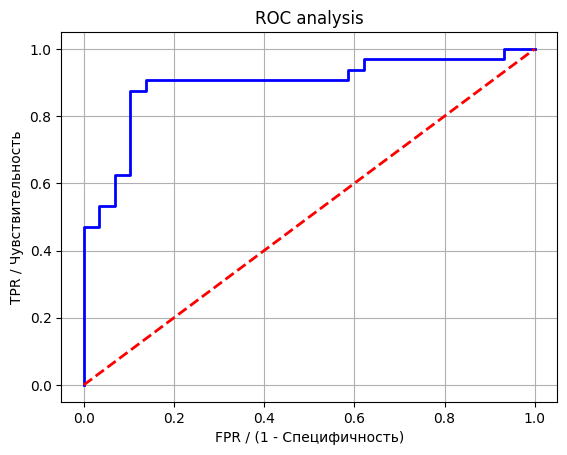

In [25]:
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Roc кривая')

plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Случайный классификатор')

plt.xlabel("FPR / (1 - Специфичность)")
plt.ylabel("TPR / Чувствительность")
plt.title("ROC analysis")
plt.grid(True)
plt.show

In [64]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [65]:
y_pred = logreg.predict(X_test)

In [66]:
print(f"Кол-во неправльных точек {X_test.shape[0]} : {(y_test != y_pred).sum()}")

Кол-во неправльных точек 61 : 7


In [67]:
f"{(100 - (y_test != y_pred).sum() / X_test.shape[0]* 100):.2f}%"

'88.52%'

In [68]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 3, 29]])

In [30]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [31]:
f1_score(y_test, y_pred)

0.8923076923076924

In [32]:
precision_score(y_test, y_pred)

0.8787878787878788

In [33]:
recall_score(y_test, y_pred)

0.90625

In [34]:
y_probs = logreg.predict_proba(X_test)[:, 1]

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
f"Площадь: {roc_auc:.4f}"

'Площадь: 0.9267'

<function matplotlib.pyplot.show(close=None, block=None)>

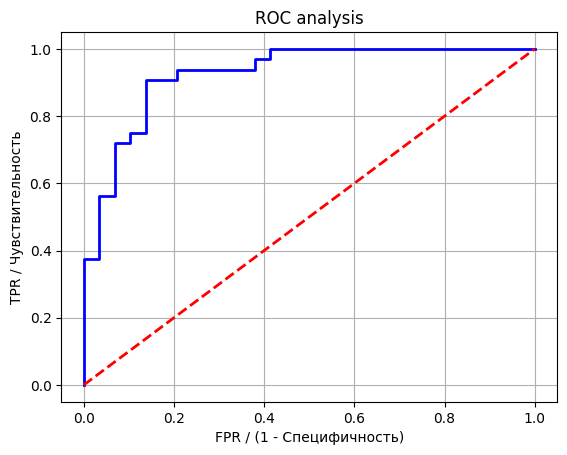

In [36]:
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Roc кривая')

plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Случайный классификатор')

plt.xlabel("FPR / (1 - Специфичность)")
plt.ylabel("TPR / Чувствительность")
plt.title("ROC analysis")
plt.grid(True)
plt.show

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
acc_series = []

In [39]:
for k in range(1, 21):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	accuracy = accuracy_score(y_test, y_pred)
	acc_series.append(accuracy)


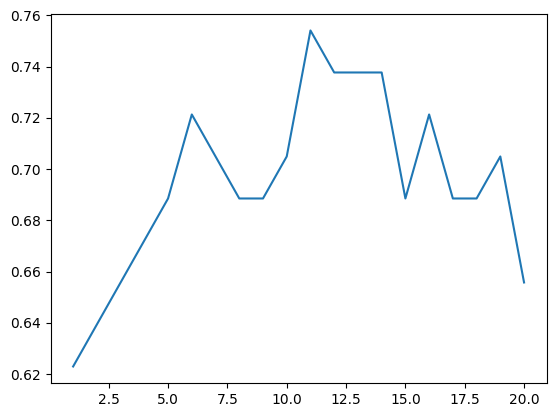

In [40]:
plt.plot(range(1, 21), acc_series)
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[20,  9],
       [ 6, 26]])

In [43]:
print(f"Кол-во неправльных точек {X_test.shape[0]} : {(y_test != y_pred).sum()}")

Кол-во неправльных точек 61 : 15


In [44]:
f"{(100 - (y_test != y_pred).sum() / X_test.shape[0]* 100):.2f}%"

'75.41%'

In [45]:
confusion_matrix(y_test, y_pred)

array([[20,  9],
       [ 6, 26]])

In [46]:
f1_score(y_test, y_pred)

0.7761194029850746

In [47]:
precision_score(y_test, y_pred)

0.7428571428571429

In [48]:
recall_score(y_test, y_pred)

0.8125

In [49]:
confusion_matrix(y_test, y_pred)

array([[20,  9],
       [ 6, 26]])

In [50]:
y_probs = knn.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
f"Площадь: {roc_auc:.4f}"

'Площадь: 0.8066'

<function matplotlib.pyplot.show(close=None, block=None)>

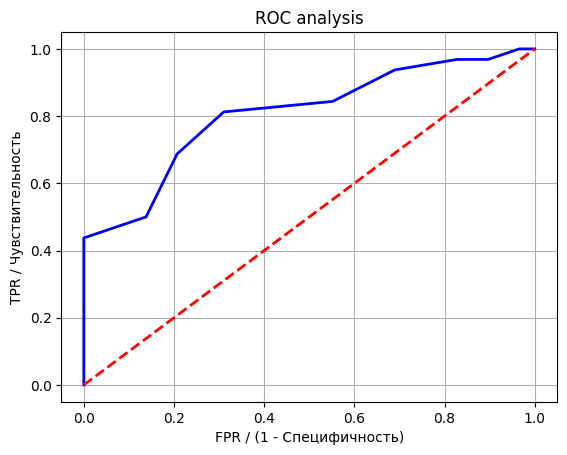

In [52]:
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Roc кривая')

plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Случайный классификатор')

plt.xlabel("FPR / (1 - Специфичность)")
plt.ylabel("TPR / Чувствительность")
plt.title("ROC analysis")
plt.grid(True)
plt.show